## EMP data exploration - data found in [Polarization paper](https://www.nature.com/articles/s41559-020-01353-4) from Machado et al. (2021)

In the paper by Machado et.al. (2021), the author's simulate assembly of communities (up to 40 species) accross multiple habitats. They have found highly cooperative communities to be prevalent in both free-living and host-associated habitats, whereas, highly competitive communities are found essentially in free-living environments, such as soil.

The environment in which these communities reside potentially have driven their strategies. On one hand, free-living environments that have scarce nutritional richness have led to evolutionary adptation in competing to  survive, whereas, host-associated environments are normally nutritionally rich which seems to support more cooperative species with increased facilitation strategies that might also be benefitial for migration between hosts and external enviroments.

Using a metabolic modelling approach, I will subset a range of communities that spans diverse enviromental materials, from which they were collected, and calculate the potential of their interaction. The goal is to find how this interactions are structured and if they follow any pattern that could be used for *in silico* microbial community simulations.

I will use data from the **[EARTH MICROBIOME PROJECT](https://earthmicrobiome.org/)** that can be found in their [GitHub](https://github.com/biocore/emp) repo, a collection of metabolic models published [here](https://github.com/cdanielmachado/embl_gems) and its respective [RefSeq Index Table](https://www.ncbi.nlm.nih.gov/refseq/) ([release 201](https://github.com/cdanielmachado/carveme/tree/master/carveme/data/input)).

<br>

## 1. Subsetting data

In [1]:
!conda env list

# conda environments:
#
base                     /Users/vitorferreira/miniconda3
project               *  /Users/vitorferreira/miniconda3/envs/project



In [2]:
%matplotlib inline

In [3]:
# Import Libraries
import pandas as pd
import matplotlib as mpl

### I will start by loading all the reference datasets:

In [5]:
# Loading REFSEQ table with acession numbers
refseq = load_ncbi_table("../data/refseq_release_201.tsv")
refseq

,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,version_status,...,release_type,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material
assembly_accession,,,,,,,,,,,,,,,,,,,,,
GCF_000001215.4,PRJNA164,SAMN02803731,NaN,reference genome,7227,7227,Drosophila melanogaster,NaN,NaN,latest,...,Major,Full,2014/08/01,Release 6 plus ISO1 MT,The FlyBase Consortium/Berkeley Drosophila Gen...,GCA_000001215.4,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,NaN
GCF_000001405.39,PRJNA168,NaN,NaN,reference genome,9606,9606,Homo sapiens,NaN,NaN,latest,...,Patch,Full,2019/02/28,GRCh38.p13,Genome Reference Consortium,GCA_000001405.28,different,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,NaN
GCF_000001635.26,PRJNA169,NaN,NaN,reference genome,10090,10090,Mus musculus,NaN,NaN,latest,...,Patch,Full,2017/09/15,GRCm38.p6,Genome Reference Consortium,GCA_000001635.8,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,NaN
GCF_000001735.4,PRJNA116,SAMN03081427,NaN,reference genome,3702,3702,Arabidopsis thaliana,ecotype=Columbia,NaN,latest,...,Minor,Full,2018/03/15,TAIR10.1,The Arabidopsis Information Resource (TAIR),GCA_000001735.2,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,NaN
GCF_000001895.5,PRJNA12455,SAMN02808228,AABR00000000.7,representative genome,10116,10116,Rattus norvegicus,strain=mixed,NaN,latest,...,Major,Full,2014/07/01,Rnor_6.0,Rat Genome Sequencing Consortium,GCA_000001895.4,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_903995475.1,PRJNA224116,SAMEA7110814,CAJFAE000000000.1,na,766224,766224,Vibrio jasicida,NaN,Vibrio jasicida 20LP,latest,...,Major,Full,2020/08/20,ASM90399547v1,iBB-IST,GCA_903995475.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/903...,NaN,NaN
GCF_903995485.1,PRJNA224116,SAMEA7110813,CAJFAD000000000.1,na,170679,170679,Vibrio chagasii,NaN,Vibrio chagasii 18LP,latest,...,Major,Full,2020/08/20,ASM90399548v1,iBB-IST,GCA_903995485.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/903...,NaN,NaN
GCF_903995555.1,PRJNA224116,SAMEA7175806,CAJFAG000000000.1,na,316,316,Pseudomonas stutzeri,NaN,PSEUDT2.31D-1,latest,...,Major,Full,2020/08/20,PSEUDT2,CBMSO,GCA_903995555.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/903...,NaN,NaN


In [6]:
# Loading metadata
metadata = pd.read_csv("../data/emp_qiime_mapping_qc_filtered.tsv", sep="\t")

# change the name of columns
metadata.rename(columns={'#SampleID': 'sample'}, inplace=True)

metadata

,sample,BarcodeSequence,LinkerPrimerSequence,Description,host_subject_id,study_id,title,principal_investigator,doi,ebi_accession,...,adiv_shannon,adiv_faith_pd,temperature_deg_c,ph,salinity_psu,oxygen_mg_per_l,phosphate_umol_per_l,ammonium_umol_per_l,nitrate_umol_per_l,sulfate_umol_per_l
0,550.L1S1.s.1.sequence,AACGCACGCTAG,GTGCCAGCMGCCGCGGTAA,sample_1 stool,F4,550,Moving pictures of the human microbiome,Rob Knight,10.1186/gb-2011-12-5-r50,ERP021896,...,4.244831,13.631804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,550.L1S10.s.1.sequence,ACAGACCACTCA,GTGCCAGCMGCCGCGGTAA,sample_2 stool,F4,550,Moving pictures of the human microbiome,Rob Knight,10.1186/gb-2011-12-5-r50,ERP021896,...,3.027416,9.425835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,550.L1S100.s.1.sequence,ATGCACTGGCGA,GTGCCAGCMGCCGCGGTAA,sample_3 stool,F4,550,Moving pictures of the human microbiome,Rob Knight,10.1186/gb-2011-12-5-r50,ERP021896,...,3.196420,10.491161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,550.L1S101.s.1.sequence,ATTATCGTGCAC,GTGCCAGCMGCCGCGGTAA,sample_4 stool,F4,550,Moving pictures of the human microbiome,Rob Knight,10.1186/gb-2011-12-5-r50,ERP021896,...,3.714719,11.384689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,550.L1S102.s.1.sequence,CACGACAGGCTA,GTGCCAGCMGCCGCGGTAA,sample_5 stool,F4,550,Moving pictures of the human microbiome,Rob Knight,10.1186/gb-2011-12-5-r50,ERP021896,...,3.969038,15.162691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23823,2382.DPOO1.C1.HA.1.428.root.4.12.lane7.NoIndex...,ATGTTTAGACGG,GTGCCAGCMGCCGCGGTAA,Roots,HS10,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,6.353810,50.767095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23824,2382.DPOO1.C1.HA.1.427.rhizo.4.12.lane7.NoInde...,GAAAGGTGAGAA,GTGCCAGCMGCCGCGGTAA,Rhizosphere,HS10,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,9.465287,132.564052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23825,2382.DPOO1.C1.HA.1.23.root.6.11.lane1.NoIndex....,TACTGCCAGTGA,GTGCCAGCMGCCGCGGTAA,Roots,HS4,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,8.246245,99.552115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23826,2382.DPOO1.C1.HA.1.23.r1.root.6.11.lane7.NoInd...,ACTTTGCTTTGC,GTGCCAGCMGCCGCGGTAA,Roots,HS10,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,6.808210,68.164201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### To note that the *"value"* column on the  `samples` dataset below refers to their relative abundances!

In [7]:
# Loading samples with relative abundances
samples = pd.read_csv("../data/emp_150bp_filtered.tsv", sep="\t")
samples.rename(columns={'value': 'relat_abund'}, inplace=True)
samples

,sample,org_id,relat_abund
0,1001.SKB1,Acidovorax_konjaci_DSM_7481,0.004495
1,1001.SKB1,Acidovorax_soli_DSM_25157,0.000642
2,1001.SKB1,Acinetobacter_brisouii_CIP_110357,0.000161
3,1001.SKB1,Acinetobacter_indicus_CIP_110367,0.004495
4,1001.SKB1,Actinomadura_meyerae_DSM_44715,0.000642
...,...,...,...
1409250,990.KA3U.E.25,Verrucomicrobium_spinosum_DSM_4136_JCM_18804,0.000089
1409251,990.KA3U.E.25,Verrucosispora_sediminis_CGMCC_4_3550,0.000333
1409252,990.KA3U.E.25,Viridibacillus_arvi_DSM_16317,0.000011
1409253,990.KA3U.E.25,Williamsia_muralis_NBRC_105860,0.000022


In [8]:
# Loading metadata for organism metabolic models
metabolic_models = pd.read_csv("../data/model_list.tsv", sep="\t", usecols=[0,4])
metabolic_models

,assembly_accession,file_path
0,GCF_000010525.1,models/a/azorhizobium/Azorhizobium_caulinodans...
1,GCF_000007365.1,models/b/buchnera/Buchnera_aphidicola_str_Sg_S...
2,GCF_000007725.1,models/b/buchnera/Buchnera_aphidicola_str_Bp_B...
3,GCF_000009605.1,models/b/buchnera/Buchnera_aphidicola_str_APS_...
4,GCF_000090965.1,models/b/buchnera/Buchnera_aphidicola_BCc.xml.gz
...,...,...
5583,GCF_002220865.1,models/b/bacillus/Bacillus_xerothermodurans_AT...
5584,GCF_002110465.1,models/u/unicellular/unicellular_cyanobacteriu...
5585,GCF_002172675.1,models/u/unicellular/unicellular_cyanobacteriu...
5586,GCF_900184705.1,models/b/brevefilum/Brevefilum_fermentans.xml.gz


### After, I will merge the collection of  `metabolic_models` reference with `samples` by Organism IDs

In [9]:
# Get the organism IDs from the file path
metabolic_models['org_id'] = metabolic_models['file_path'].apply(lambda x: os.path.basename(x)[:-7])
metabolic_models = metabolic_models.drop('file_path', axis=1)
metabolic_models

,assembly_accession,org_id
0,GCF_000010525.1,Azorhizobium_caulinodans_ORS_571
1,GCF_000007365.1,Buchnera_aphidicola_str_Sg_Schizaphis_graminum
2,GCF_000007725.1,Buchnera_aphidicola_str_Bp_Baizongia_pistaciae
3,GCF_000009605.1,Buchnera_aphidicola_str_APS_Acyrthosiphon_pisum
4,GCF_000090965.1,Buchnera_aphidicola_BCc
...,...,...
5583,GCF_002220865.1,Bacillus_xerothermodurans_ATCC_27380
5584,GCF_002110465.1,unicellular_cyanobacterium_SU2
5585,GCF_002172675.1,unicellular_cyanobacterium_SU3
5586,GCF_900184705.1,Brevefilum_fermentans


In [10]:
samples = pd.merge(samples, metabolic_models, on='org_id')
samples

,sample,org_id,relat_abund,assembly_accession
0,1001.SKB1,Acidovorax_konjaci_DSM_7481,0.004495,GCF_900112675.1
1,1001.SKB2,Acidovorax_konjaci_DSM_7481,0.002003,GCF_900112675.1
2,1001.SKB3,Acidovorax_konjaci_DSM_7481,0.003430,GCF_900112675.1
3,1001.SKB4,Acidovorax_konjaci_DSM_7481,0.003983,GCF_900112675.1
4,1001.SKB5,Acidovorax_konjaci_DSM_7481,0.003380,GCF_900112675.1
...,...,...,...,...
1410868,990.KA3F.D.24,Streptomyces_cattleya_NRRL_8057_DSM_46488,0.000022,GCF_000240165.1
1410869,990.KA3F.E.08,Streptomyces_cattleya_NRRL_8057_DSM_46488,0.000027,GCF_000240165.1
1410870,990.KA3F.E.09,Streptomyces_cattleya_NRRL_8057_DSM_46488,0.000045,GCF_000240165.1
1410871,990.KA3F.E.11,Streptomyces_cattleya_NRRL_8057_DSM_46488,0.000025,GCF_000240165.1


## I will now combine the features of interest with the `samples` dataset that was combined above.

In [11]:
metadata.columns.values

array(['sample', 'BarcodeSequence', 'LinkerPrimerSequence', 'Description',
       'host_subject_id', 'study_id', 'title', 'principal_investigator',
       'doi', 'ebi_accession', 'target_gene', 'target_subfragment',
       'pcr_primers', 'illumina_technology', 'extraction_center',
       'run_center', 'run_date', 'read_length_bp',
       'sequences_split_libraries', 'observations_closed_ref_greengenes',
       'observations_closed_ref_silva',
       'observations_open_ref_greengenes', 'observations_deblur_90bp',
       'observations_deblur_100bp', 'observations_deblur_150bp',
       'emp_release1', 'qc_filtered', 'subset_10k', 'subset_5k',
       'subset_2k', 'sample_taxid', 'sample_scientific_name',
       'host_taxid', 'host_common_name_provided', 'host_common_name',
       'host_scientific_name', 'host_superkingdom', 'host_kingdom',
       'host_phylum', 'host_class', 'host_order', 'host_family',
       'host_genus', 'host_species', 'collection_timestamp', 'country',
       'latitud

### From `metadata` dataset I will choose the following:

In [12]:
features_interest = ['sample', 'Description', 'title', 'principal_investigator', 'ebi_accession',
                     'target_gene', 'sample_taxid', 'sample_scientific_name', 'host_taxid', 
                     'host_common_name_provided', 'host_common_name', 'host_scientific_name', 'host_kingdom',
                     'host_phylum', 'host_class', 'host_order', 'host_family', 'host_genus', 'host_species', 
                     'env_biome', 'env_feature', 'env_material', 'envo_biome_0', 'envo_biome_1', 'envo_biome_2', 
                     'envo_biome_3', 'envo_biome_4', 'envo_biome_5', 'empo_0', 'empo_1', 'empo_2', 'empo_3']

In [13]:
samples_envo_metadata = pd.merge(samples, metadata[features_interest], on='sample')
samples_envo_metadata

,sample,org_id,relat_abund,assembly_accession,Description,title,principal_investigator,ebi_accession,target_gene,sample_taxid,...,envo_biome_0,envo_biome_1,envo_biome_2,envo_biome_3,envo_biome_4,envo_biome_5,empo_0,empo_1,empo_2,empo_3
0,1001.SKB1,Acidovorax_konjaci_DSM_7481,0.004495,GCF_900112675.1,Burmese bulk,Understanding cultivar-specificity and soil de...,Suzanne Kennedy,ERP016540,16S rRNA,410658,...,biome,terrestrial biome,anthropogenic terrestrial biome,cropland biome,NaN,NaN,EMP sample,Free-living,Non-saline,Soil (non-saline)
1,1001.SKB1,Acidovorax_soli_DSM_25157,0.000642,GCF_900107605.1,Burmese bulk,Understanding cultivar-specificity and soil de...,Suzanne Kennedy,ERP016540,16S rRNA,410658,...,biome,terrestrial biome,anthropogenic terrestrial biome,cropland biome,NaN,NaN,EMP sample,Free-living,Non-saline,Soil (non-saline)
2,1001.SKB1,Acinetobacter_brisouii_CIP_110357,0.000161,GCF_000488275.1,Burmese bulk,Understanding cultivar-specificity and soil de...,Suzanne Kennedy,ERP016540,16S rRNA,410658,...,biome,terrestrial biome,anthropogenic terrestrial biome,cropland biome,NaN,NaN,EMP sample,Free-living,Non-saline,Soil (non-saline)
3,1001.SKB1,Acinetobacter_indicus_CIP_110367,0.004495,GCF_000488255.1,Burmese bulk,Understanding cultivar-specificity and soil de...,Suzanne Kennedy,ERP016540,16S rRNA,410658,...,biome,terrestrial biome,anthropogenic terrestrial biome,cropland biome,NaN,NaN,EMP sample,Free-living,Non-saline,Soil (non-saline)
4,1001.SKB1,Actinomadura_meyerae_DSM_44715,0.000642,GCF_900188445.1,Burmese bulk,Understanding cultivar-specificity and soil de...,Suzanne Kennedy,ERP016540,16S rRNA,410658,...,biome,terrestrial biome,anthropogenic terrestrial biome,cropland biome,NaN,NaN,EMP sample,Free-living,Non-saline,Soil (non-saline)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410868,2229.S2.T2.5.HP2.Thomas.CMB.Seaweed.lane6.NoIn...,Pelagicola_litorisediminis_CECT_8287,0.004470,GCF_900172295.1,DNA from surface swab of Phyllospora comosa ma...,Continental-scale variation in seaweed host-as...,Torsten Thomas,ERP021895,16S rRNA,1300146,...,biome,aquatic biome,marine biome,NaN,NaN,NaN,EMP sample,Host-associated,Plant,Plant surface
1410869,2229.S2.T2.5.HP2.Thomas.CMB.Seaweed.lane6.NoIn...,Zobellia_uliginosa_MAR_2009_138,0.000271,GCF_000744555.1,DNA from surface swab of Phyllospora comosa ma...,Continental-scale variation in seaweed host-as...,Torsten Thomas,ERP021895,16S rRNA,1300146,...,biome,aquatic biome,marine biome,NaN,NaN,NaN,EMP sample,Host-associated,Plant,Plant surface
1410870,2229.S2.T2.5.HP2.Thomas.CMB.Seaweed.lane6.NoIn...,Mariniblastus_fucicola_FC18,0.000542,GCF_001642875.1,DNA from surface swab of Phyllospora comosa ma...,Continental-scale variation in seaweed host-as...,Torsten Thomas,ERP021895,16S rRNA,1300146,...,biome,aquatic biome,marine biome,NaN,NaN,NaN,EMP sample,Host-associated,Plant,Plant surface
1410871,2229.S2.T2.5.HP2.Thomas.CMB.Seaweed.lane6.NoIn...,Litoreibacter_ascidiaceicola_DSM_100566,0.017610,GCF_900129235.1,DNA from surface swab of Phyllospora comosa ma...,Continental-scale variation in seaweed host-as...,Torsten Thomas,ERP021895,16S rRNA,1300146,...,biome,aquatic biome,marine biome,NaN,NaN,NaN,EMP sample,Host-associated,Plant,Plant surface


### In total we have a 12538 samples...

In [14]:
sample_list = sorted(set(samples_envo_metadata["sample"]))
len(sample_list)

12538

### ...that are distributed as:

In [15]:
samples_by_envo = samples_envo_metadata.groupby(['env_material', 'sample']).size().reset_index(name='samples')
samples_by_envo.sort_values("samples", ascending=False)
samples_by_envo['env_material'].value_counts()

fresh water          2977
feces                2232
organic material     1874
soil                 1670
sand                  816
sebum                 758
dust                  669
sea water             351
marine sediment       320
mucus                 275
biofilm               141
saliva                 93
rhizosphere            88
bulk soil              65
stream sediment        44
excreta                37
travertine             29
sediment               22
animal habitation      17
surface layer          16
coastal water          13
underground water      13
brackish water          7
wood                    6
saline water            5
Name: env_material, dtype: int64

In [16]:
samples_comms_sizes = samples_envo_metadata.groupby(['sample']).size().reset_index(name='community_size')

### Where most of the community sizes are up to 100 species but we still have a fair amount of large communities, as seen in the histogram below!

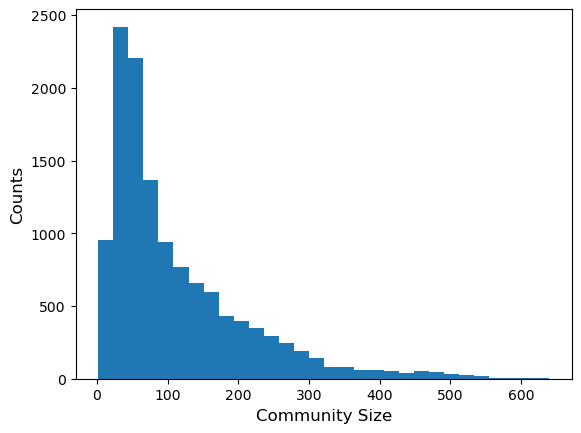

In [17]:
plt.hist(samples_comms_sizes['community_size'], density=False, bins=30)
plt.xlabel("Community Size", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.show()

## For an initial analysis, I have extracted the smallest communities for each environmental matter to help develop analysis...

In [18]:
envo = sorted(set(samples_envo_metadata['env_material']))
envo

['animal habitation',
 'biofilm',
 'brackish water',
 'bulk soil',
 'coastal water',
 'dust',
 'excreta',
 'feces',
 'fresh water',
 'marine sediment',
 'mucus',
 'organic material',
 'rhizosphere',
 'saline water',
 'saliva',
 'sand',
 'sea water',
 'sebum',
 'sediment',
 'soil',
 'stream sediment',
 'surface layer',
 'travertine',
 'underground water',
 'wood']

In [19]:
# I will run a for loop and store the results in a dataframe
small_size_samples = pd.DataFrame()

# For every "env_material", select the 10 smallest communities
for material in envo:
    temp_sample = samples_envo_metadata.loc[samples_envo_metadata['env_material'] == material]
    temp_comm = temp_sample.groupby(['sample']).size().reset_index(name='community_size')
    temp_comm = temp_comm.nsmallest(10, 'community_size')
    
    # For each of the "small" communities retrieve their metadata and store it in one Dataframe
    temp_small_size_samples = pd.DataFrame()
    for index in range(len(temp_comm)):
        temp_id = temp_comm.iloc[index][0]
        temp_id_sample = temp_sample[temp_sample['sample'] == temp_id]
        temp_small_size_samples = pd.concat([temp_small_size_samples, temp_id_sample])
        
    small_size_samples = pd.concat([small_size_samples, temp_small_size_samples])


In [20]:
small_size_samples

,sample,org_id,relat_abund,assembly_accession,Description,title,principal_investigator,ebi_accession,target_gene,sample_taxid,...,envo_biome_0,envo_biome_1,envo_biome_2,envo_biome_3,envo_biome_4,envo_biome_5,empo_0,empo_1,empo_2,empo_3
1203782,1747.212070.holding.pen.B.debris,Arthrobacter_enclensis_NIO_1008,0.001934,GCF_001457025.1,212070 holding pen dust/debris (plant matter) ...,The oral and skin microbiomes of captive Komod...,Rob Knight,ERP016252,16S rRNA,410656,...,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,NaN,EMP sample,Host-associated,Plant,Plant corpus
1203783,1747.212070.holding.pen.B.debris,Beutenbergia_cavernae_DSM_12333,0.001657,GCF_000023105.1,212070 holding pen dust/debris (plant matter) ...,The oral and skin microbiomes of captive Komod...,Rob Knight,ERP016252,16S rRNA,410656,...,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,NaN,EMP sample,Host-associated,Plant,Plant corpus
1203784,1747.212070.holding.pen.B.debris,Buttiauxella_ferragutiae_ATCC_51602,0.002210,GCF_001654915.1,212070 holding pen dust/debris (plant matter) ...,The oral and skin microbiomes of captive Komod...,Rob Knight,ERP016252,16S rRNA,410656,...,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,NaN,EMP sample,Host-associated,Plant,Plant corpus
1203785,1747.212070.holding.pen.B.debris,Cellvibrio_mixtus_subsp_mixtus_J3_8,0.001796,GCF_000766945.1,212070 holding pen dust/debris (plant matter) ...,The oral and skin microbiomes of captive Komod...,Rob Knight,ERP016252,16S rRNA,410656,...,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,NaN,EMP sample,Host-associated,Plant,Plant corpus
1203786,1747.212070.holding.pen.B.debris,Paracoccus_halophilus_JCM_14014,0.000414,GCF_000763905.1,212070 holding pen dust/debris (plant matter) ...,The oral and skin microbiomes of captive Komod...,Rob Knight,ERP016252,16S rRNA,410656,...,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,NaN,EMP sample,Host-associated,Plant,Plant corpus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101979,1747.DZF.6202012.RJ.log,Marinactinospora_thermotolerans_DSM_45154,0.000081,GCF_900167435.1,Raja log,The oral and skin microbiomes of captive Komod...,Rob Knight,ERP016252,16S rRNA,410656,...,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,NaN,EMP sample,Free-living,Non-saline,Surface (non-saline)
101980,1747.DZF.6202012.RJ.log,Nitrococcus_mobilis_Nb_231,0.000464,GCF_000153205.1,Raja log,The oral and skin microbiomes of captive Komod...,Rob Knight,ERP016252,16S rRNA,410656,...,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,NaN,EMP sample,Free-living,Non-saline,Surface (non-saline)
101981,1747.DZF.6202012.RJ.log,Nocardiopsis_halotolerans_DSM_44410,0.000282,GCF_000341065.1,Raja log,The oral and skin microbiomes of captive Komod...,Rob Knight,ERP016252,16S rRNA,410656,...,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,NaN,EMP sample,Free-living,Non-saline,Surface (non-saline)
101982,1747.DZF.6202012.RJ.log,Clostridium_acetireducens_DSM_10703,0.000040,GCF_001758365.1,Raja log,The oral and skin microbiomes of captive Komod...,Rob Knight,ERP016252,16S rRNA,410656,...,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,NaN,EMP sample,Free-living,Non-saline,Surface (non-saline)


In [22]:
small_communities = small_size_samples.groupby(['sample']).size().reset_index(name='community_size')
small_communities

,sample,community_size
0,1024.SH004.C1.RH.3.211.bulk.9.11.G1.L00,102
1,1024.SH007.C6.RH.5.185.flw.6.11.G1.L00,3
2,1064.W.CJV187,4
3,1222.B3.5.13.06,24
4,1222.B5.5.12.06,31
...,...,...
233,945.P10.E1.lane3.NoIndex.L003,10
234,945.P11.B6.lane3.NoIndex.L003,11
235,945.P11.D11.lane3.NoIndex.L003,13
236,945.P11.F9.lane3.NoIndex.L003,10


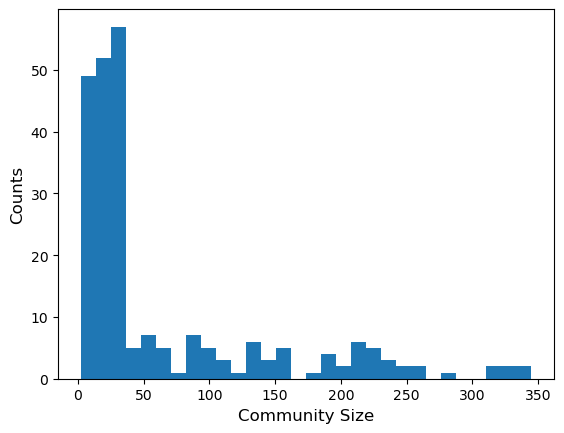

In [23]:
plt.hist(small_communities['community_size'], density=False, bins=30)
plt.xlabel("Community Size", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.show()

### As some of the smallest communities in the different `env_material` require a lot of computational power to calculate their interactions, I started with communities up to 20 species...

In [24]:
small_communities = small_communities[small_communities["community_size"].between(0,20)]
small_communities

,sample,community_size
1,1024.SH007.C6.RH.5.185.flw.6.11.G1.L00,3
2,1064.W.CJV187,4
5,1222.B5.5.7.06,20
10,1673.MBS0428.5,17
11,1673.MBS65.4,17
...,...,...
233,945.P10.E1.lane3.NoIndex.L003,10
234,945.P11.B6.lane3.NoIndex.L003,11
235,945.P11.D11.lane3.NoIndex.L003,13
236,945.P11.F9.lane3.NoIndex.L003,10


In [25]:
small_sample_ids = sorted(set(small_communities['sample']))
small_comms_samples_meta = small_size_samples[small_size_samples['sample'].isin(small_sample_ids)]
small_comms_samples_meta

,sample,org_id,relat_abund,assembly_accession,Description,title,principal_investigator,ebi_accession,target_gene,sample_taxid,...,envo_biome_0,envo_biome_1,envo_biome_2,envo_biome_3,envo_biome_4,envo_biome_5,empo_0,empo_1,empo_2,empo_3
1367805,895.Puhimau.mat.3,Phenylobacterium_immobile_ATCC_35973_strain_E,0.000299,GCF_001375595.1,geothermal field biofilm,Kilauea geothermal soils and biofilms,Gary M. King,ERP020591,16S rRNA,718308,...,biome,terrestrial biome,forest biome,coniferous forest biome,tropical coniferous forest biome,NaN,EMP sample,Free-living,Non-saline,Surface (non-saline)
1367806,895.Puhimau.mat.3,Rhodomicrobium_vannielii_ATCC_17100,0.019606,GCF_000166055.1,geothermal field biofilm,Kilauea geothermal soils and biofilms,Gary M. King,ERP020591,16S rRNA,718308,...,biome,terrestrial biome,forest biome,coniferous forest biome,tropical coniferous forest biome,NaN,EMP sample,Free-living,Non-saline,Surface (non-saline)
1367807,895.Puhimau.mat.3,Frateuria_terrea_CGMCC_1_7053,0.001534,GCF_900115705.1,geothermal field biofilm,Kilauea geothermal soils and biofilms,Gary M. King,ERP020591,16S rRNA,718308,...,biome,terrestrial biome,forest biome,coniferous forest biome,tropical coniferous forest biome,NaN,EMP sample,Free-living,Non-saline,Surface (non-saline)
1367808,895.Puhimau.mat.3,Caballeronia_glathei_DSM_50014,0.000561,GCF_000698595.1,geothermal field biofilm,Kilauea geothermal soils and biofilms,Gary M. King,ERP020591,16S rRNA,718308,...,biome,terrestrial biome,forest biome,coniferous forest biome,tropical coniferous forest biome,NaN,EMP sample,Free-living,Non-saline,Surface (non-saline)
1367809,895.Puhimau.mat.3,Paraburkholderia_sprentiae_WSM5005,0.001871,GCF_001865575.1,geothermal field biofilm,Kilauea geothermal soils and biofilms,Gary M. King,ERP020591,16S rRNA,718308,...,biome,terrestrial biome,forest biome,coniferous forest biome,tropical coniferous forest biome,NaN,EMP sample,Free-living,Non-saline,Surface (non-saline)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369523,1883.2009.289.Crump.Artic.LTREB.main.lane3.NoI...,Sphingomonas_paucimobilis_NBRC_13935,0.003357,GCF_000739895.2,soil water,Microbial diversity in arctic freshwaters is s...,Byron Crump,ERP017459,16S rRNA,449393,...,biome,terrestrial biome,tundra biome,NaN,NaN,NaN,EMP sample,Free-living,Non-saline,Water (non-saline)
1369524,1883.2009.289.Crump.Artic.LTREB.main.lane3.NoI...,Kutzneria_albida_DSM_43870,0.009131,GCF_000525635.1,soil water,Microbial diversity in arctic freshwaters is s...,Byron Crump,ERP017459,16S rRNA,449393,...,biome,terrestrial biome,tundra biome,NaN,NaN,NaN,EMP sample,Free-living,Non-saline,Water (non-saline)
1369525,1883.2009.289.Crump.Artic.LTREB.main.lane3.NoI...,Xanthomonas_gardneri_ICMP7383,0.002954,GCF_001908775.1,soil water,Microbial diversity in arctic freshwaters is s...,Byron Crump,ERP017459,16S rRNA,449393,...,biome,terrestrial biome,tundra biome,NaN,NaN,NaN,EMP sample,Free-living,Non-saline,Water (non-saline)
1369526,1883.2009.289.Crump.Artic.LTREB.main.lane3.NoI...,Geobacter_daltonii_FRC_32,0.006043,GCF_000022265.1,soil water,Microbial diversity in arctic freshwaters is s...,Byron Crump,ERP017459,16S rRNA,449393,...,biome,terrestrial biome,tundra biome,NaN,NaN,NaN,EMP sample,Free-living,Non-saline,Water (non-saline)


In [26]:
small_communities['community_size'].sum()

924

<br>

## 2. Running analysis...

### I have then collected the sample list of the smallest communities, get each individual organism and its corresponding metadata and store it in a `csv` file.

After wrangling all the data, a `bash` script will get `assembly_acession` and `org_id` to feed into `CarveMe` and generate the metabolic models for each individual in the community. 

Once downloaded and generated the metabolic models, `SMETANA` will use these models to estimate, from the predicted metabolic reactions, a community **global** analysis and an individual **detailed** analysis.

Specifically, the **global** analysis will calculate:

- the community *Metabolic Resource Overlap (**MRO**)* that quantifies the similarity of the nutritional requirements between all species in a community, and reflects the resource competition;

- the *Metabolic Interaction Potential (**MIP**)* which indicates the number of metabolites that can be exchanged among the community members to decrease their dependency on the abiotic environment, and it can work as a proxy for cooperative metabolism.

The **detailed** analysis, and which require intensive computational power, calculates:

- *Species Coupling Score (**SCS**)* measures the dependency of growth of species A on the presence of species B. The algorithm sets a problem to find the minimal number of species B to support growth of target Species A. Once identified the group of species, this is set as constraint and eliminated from the solution. The algorithm looks for another solutions. The score represents the fraction of solutions in which species B is present.
<br>

- *Metabolic Uptake Score (**MUS**)* measures the growth dependency of species A on a certain metabolite *m* that is donated by other species member. This step uses a similar approach as above but here calculating the minimal metabolite requirements;
<br>

- *Metabolic Production Score (**MPS**)* a binary score that indicates if a given species can produce metabolite *m*;
<br>

- **SMETANA** is the sum of all interdependencies in a certain nutritional environment (calculated as the product of the three previous scores)

The `get_acessions.sh` bash script was the first version to use in serial procedure and produce results for communitties smaller than 20 species (currently found in [sandbox]()). ##### GITHUB LINK #####

Next steps is to develop more robust script to be runned in computer with multiple cores or HPC to speed up analysis and generate greater communities interactions.

In [28]:
sample_list = sorted(set(small_comms_samples_meta["sample"]))

In [ ]:
for index in range(len(sample_list)):
        temp_id = sample_list[index]
        temp_id_sample = small_comms_samples_meta[small_comms_samples_meta['sample'] == temp_id]
        
        temp_id_sample.to_csv("./sampled_acessions.csv", index=False, header=False,
                              columns=['assembly_accession', 'sample', 'org_id'])
        
        !bash ./get_acessions.sh

Carving...
mkdir: output/1222.B5.5.7.06: File exists
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_900113825.1.faa.gz -o GCF_900113825.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_002201315.1.faa.gz -o GCF_002201315.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_001550135.1.faa.gz -o GCF_001550135.1.faa.tsv --more-sensitive --top 10
L

/Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/smetana/smetana.py:263: UserWarning: MIP: Failed to find a valid solution for non-interacting community
  warn('MIP: Failed to find a valid solution for non-interacting community')
Running MRO for community all on medium complete...
Done.
Loading community: all
Running SCS for community all on medium minimal...
Running MUS for community all on medium minimal...
Running MPS for community all on medium minimal...
Done.
Completed!!!
Carving...
mkdir: output/1673.MBS0428.5: File exists
File exists, skipping.
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_900107605.1.faa.gz -o GCF_900107605.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
File exists, skipping.
Running diamond...
diamond blastp -d

Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_001457025.1.faa.gz -o GCF_001457025.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_000803645.1.faa.gz -o GCF_000803645.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_001484935.1.faa.gz -o GCF_001484935.1.faa.tsv --

Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_000741135.1.faa.gz -o GCF_000741135.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_002015075.1.faa.gz -o GCF_002015075.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_0

Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_002015075.1.faa.gz -o GCF_002015075.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_000296835.1.faa.gz -o GCF_000296835.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_0

Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_000190755.2.faa.gz -o GCF_000190755.2.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_001931675.1.faa.gz -o GCF_001931675.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_0

Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_000010185.1.faa.gz -o GCF_000010185.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_900101865.1.faa.gz -o GCF_900101865.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_0

Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_001543285.1.faa.gz -o GCF_001543285.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_001275345.1.faa.gz -o GCF_001275345.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_0

Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Loading community: all
Running MIP for community all on medium complete...
Running MRO for community all on medium complete...
Done.
Loading community: all
Running SCS for community all on medium minimal...
Running MUS for community all on medium minimal...
Running MPS for community all on medium minimal...
Done.
Completed!!!
Carving...
mkdir: output/2192.H06b.Nose.3273.lane6.NoIndex.L006: File exists
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_002115725.1.faa.gz -o GCF_002115725.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/ca

Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_000015285.1.faa.gz -o GCF_000015285.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_900101915.1.faa.gz -o GCF_900101915.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_0

/Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/smetana/smetana.py:160: UserWarning: MUS: Failed to find a minimal growth medium for Psychromonas_ingrahamii_37_
  warn('MUS: Failed to find a minimal growth medium for ' + org_id)
/Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/smetana/smetana.py:160: UserWarning: MUS: Failed to find a minimal growth medium for Shewanella_japonica_KCTC_22435_
  warn('MUS: Failed to find a minimal growth medium for ' + org_id)
/Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/smetana/smetana.py:160: UserWarning: MUS: Failed to find a minimal growth medium for Shewanella_pealeana_ATCC_700345_
  warn('MUS: Failed to find a minimal growth medium for ' + org_id)
/Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/smetana/smetana.py:160: UserWarning: MUS: Failed to find a minimal growth medium for Sulfitobacter_geojensis_MM_124_
  warn('MUS: Failed to find a minim

Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_001723355.1.faa.gz -o GCF_001723355.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_000787395.1.faa.gz -o GCF_000787395.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Loading community: all
Running MIP for community all on medium complete...
/Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/smetana/smetana.py:263: UserWarning: MIP: Failed to find a valid solution for non-interacting community
  warn('MIP: Failed to find a val

Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_000266945.1.faa.gz -o GCF_000266945.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_000012885.1.faa.gz -o GCF_000012885.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_0

Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_000018025.1.faa.gz -o GCF_000018025.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_000014705.1.faa.gz -o GCF_000014705.1.faa.tsv --more-sensitive --top 10
Loading universe model...
Scoring reactions...
Reconstructing a single model
Done.
waiting for carve
removing stuff to trash
Running diamond...
diamond blastp -d /Users/vitorferreira/miniconda3/envs/project/lib/python3.10/site-packages/carveme/data/generated/bigg_proteins.dmnd -q GCF_0